In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf
warnings.filterwarnings('ignore')

In [22]:
from tensorflow import  keras 

In [24]:
def reset_graph(seed=42):
  tf.random.set_seed(seed)
  np.random.seed(seed)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape ,train_labels.shape,test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

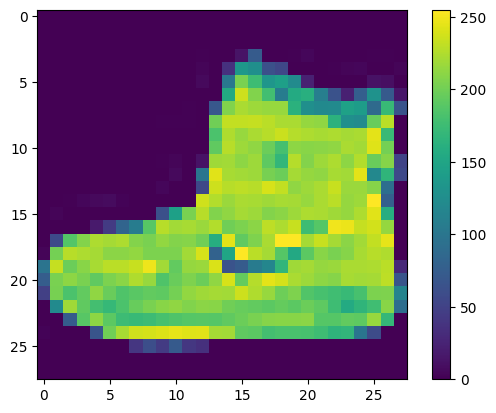

In [7]:

  plt.figure()
  plt.imshow(train_images[0])
  plt.colorbar()
  plt.grid(False)
  plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

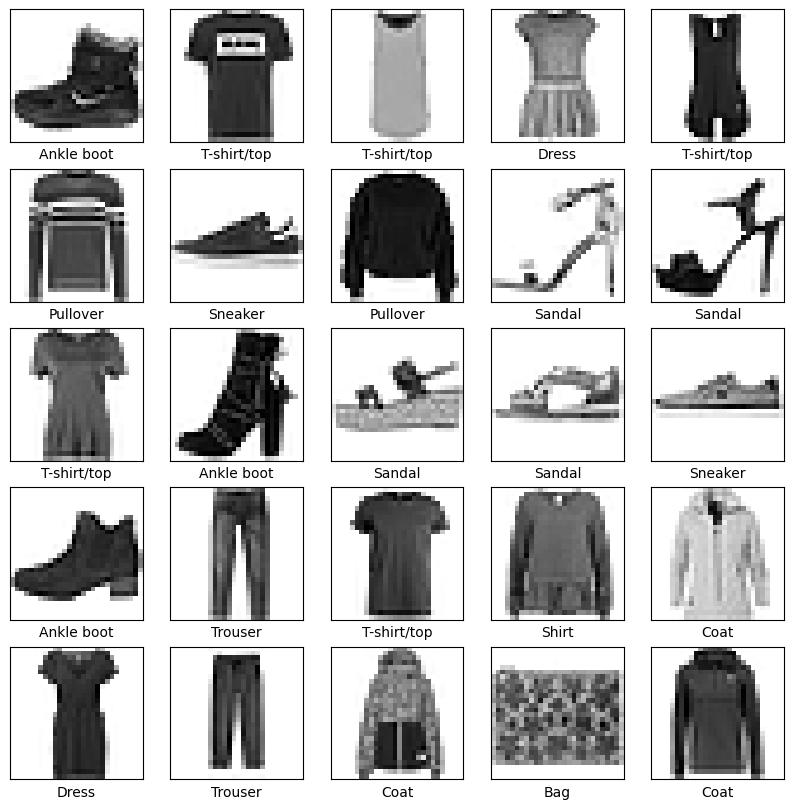

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense,  Flatten


In [40]:
reset_graph()
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
# model.add(Dense(1000, activation='relu', name='Hidden_Layer_1'))
# model.add(Dense(900, activation='relu', name='Hidden_Layer_2'))
# model.add(Dense(950, activation='relu', name='Hidden_Layer_3'))
# model.add(Dense(600, activation='relu', name='Hidden_Layer_4'))
# model.add(Dense(700, activation='relu', name='Hidden_Layer_5'))
# model.add(Dense(500, activation='relu', name='Hidden_Layer_6'))
# model.add(Dense(600, activation='relu', name='Hidden_Layer_7'))
# model.add(Dense(300, activation='relu', name='Hidden_Layer_8'))
# model.add(Dense(100, activation='relu', name='Hidden_Layer_9'))
model.add(Dense(200, activation='relu', name='Hidden_Layer_10'))
model.add(Dense(150, activation='relu', name='Hidden_Layer_11'))
model.add(Dense(100, activation='relu', name='Hidden_Layer_12'))
model.add(Dense(50, activation='relu', name='Hidden_Layer_13'))
model.add(Dense(30, activation='relu', name='Hidden_Layer_14'))
model.add(Dense(15, activation='relu', name='Hidden_Layer_15'))
model.add(Dense(10, activation='softmax', name='Output_Layer'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 Hidden_Layer_10 (Dense)     (None, 200)               157000    
                                                                 
 Hidden_Layer_11 (Dense)     (None, 150)               30150     
                                                                 
 Hidden_Layer_12 (Dense)     (None, 100)               15100     
                                                                 
 Hidden_Layer_13 (Dense)     (None, 50)                5050      
                                                                 
 Hidden_Layer_14 (Dense)     (None, 30)                1530      
                                                                 
 Hidden_Layer_15 (Dense)     (None, 15)               

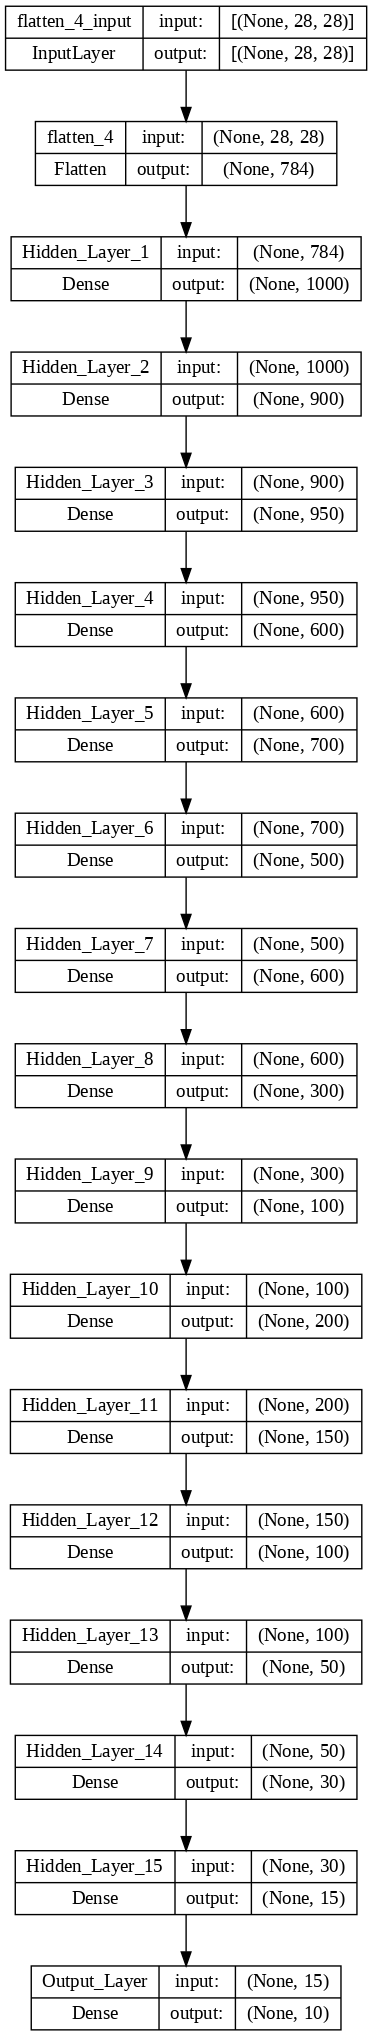

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png',
           show_shapes=True, dpi=100,
           show_layer_names=True)

In [37]:
from keras import losses  
from keras import metrics

In [41]:
reset_graph()
model.compile(loss = 'SparseCategoricalCrossentropy',     
   optimizer = 'sgd', 
   metrics = ['accuracy'])

In [43]:
reset_graph()
history = model.fit(
   train_images, train_labels, 
   batch_size = 64, 
   epochs = 50,
   validation_split=0.33
)

Epoch 1/50
629/629 [==============================] - 2s 4ms/step - loss: 0.9344 - accuracy: 0.6681 - val_loss: 0.7721 - val_accuracy: 0.7034
Epoch 2/50
629/629 [==============================] - 2s 4ms/step - loss: 0.6621 - accuracy: 0.7609 - val_loss: 0.9303 - val_accuracy: 0.6867
Epoch 3/50
629/629 [==============================] - 2s 4ms/step - loss: 0.5543 - accuracy: 0.8026 - val_loss: 0.5150 - val_accuracy: 0.8242
Epoch 4/50
629/629 [==============================] - 2s 4ms/step - loss: 0.4990 - accuracy: 0.8226 - val_loss: 0.5251 - val_accuracy: 0.8198
Epoch 5/50
629/629 [==============================] - 3s 5ms/step - loss: 0.4649 - accuracy: 0.8370 - val_loss: 0.5976 - val_accuracy: 0.7785
Epoch 6/50
629/629 [==============================] - 2s 4ms/step - loss: 0.4381 - accuracy: 0.8445 - val_loss: 0.6013 - val_accuracy: 0.7955
Epoch 7/50
629/629 [==============================] - 2s 4ms/step - loss: 0.4168 - accuracy: 0.8514 - val_loss: 0.9234 - val_accuracy: 0.7079
Epoch 

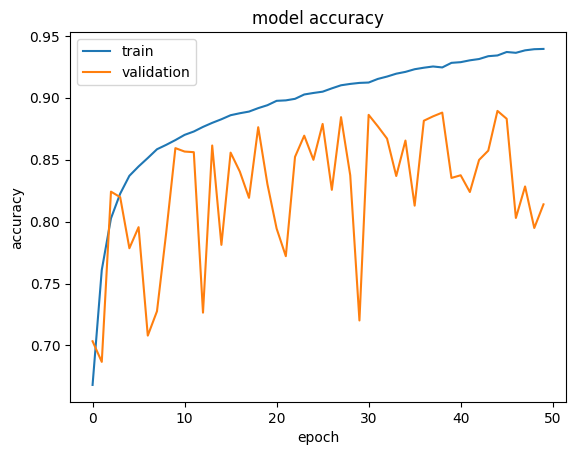

In [44]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [45]:
y_pre=model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [47]:
className = {
  "T-shirt/top": 0,
  "Trouser": 1,
  "Pullover": 2,
  "Dress": 3,
  "Coat": 4,
  "Sandal": 5,
  "Shirt": 6,
  "Sneaker": 7,
  "Bag": 8,
  "Ankle boot": 9,
}

In [53]:
className.items()

dict_items([('T-shirt/top', 0), ('Trouser', 1), ('Pullover', 2), ('Dress', 3), ('Coat', 4), ('Sandal', 5), ('Shirt', 6), ('Sneaker', 7), ('Bag', 8), ('Ankle boot', 9)])

In [61]:
new_dict={value:key for key, value in className.items()}
new_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [72]:
list2=np.argmax(y_pre, axis=-1)
list2=list(list2)

In [80]:
output = [new_dict[key] for key in list2]
# output

In [82]:
output = list(map(new_dict.get, list2))
output

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'T-shirt/top',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker',
 'Pullover',
 'Sandal',
 'Sandal',
 'Dress',
 'Pullover',
 'Trouser',
 'Pullover',
 'Pullover',
 'Bag',
 'T-shirt/top',
 'Pullover',
 'Sandal',
 'Sneaker',
 'Sandal',
 'Trouser',
 'Pullover',
 'Pullover',
 'T-shirt/top',
 'Ankle boot',
 'Dress',
 'Bag',
 'Bag',
 'Dress',
 'Dress',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sandal',
 'Sneaker',
 'Ankle boot',
 'T-shirt/top',
 'Trouser',
 'Dress',
 'Sneaker',
 'Pullover',
 'Sneaker',
 'Pullover',
 'Trouser',
 'Pullover',
 'Pullover',
 'Pullover',
 'Pullover',
 'Sandal',
 'Bag',
 'Pullover',
 'Pullover',
 'Bag',
 'Pullover',
 'Bag',
 'T-shirt/top',
 'Sneaker',
 'Sneaker',
 'Bag',
 'Sandal',
 'Trouser',
 'Trouser',
 'Dress',
 'Dress',
 'Sneaker',
 'Bag',
 'Sneaker',
 'T-shirt/top',
 'Pullover',
 'Dress',
 'Pullover',
 'Dress',
 'Trouser',
 'Pullover',
 'Bag',
 'Pullover',
 'Trouser',
 'Bag',
 'Sandal',
 'Ankle boot',
 'Sanda

In [83]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [95]:
list2

[9,
 2,
 1,
 1,
 0,
 1,
 4,
 6,
 5,
 7,
 2,
 5,
 5,
 3,
 2,
 1,
 2,
 2,
 8,
 0,
 2,
 5,
 7,
 5,
 1,
 2,
 2,
 0,
 9,
 3,
 8,
 8,
 3,
 3,
 8,
 0,
 7,
 5,
 7,
 9,
 0,
 1,
 3,
 7,
 2,
 7,
 2,
 1,
 2,
 2,
 2,
 2,
 5,
 8,
 2,
 2,
 8,
 2,
 8,
 0,
 7,
 7,
 8,
 5,
 1,
 1,
 3,
 3,
 7,
 8,
 7,
 0,
 2,
 3,
 2,
 3,
 1,
 2,
 8,
 2,
 1,
 8,
 5,
 9,
 5,
 0,
 3,
 2,
 0,
 2,
 5,
 3,
 6,
 7,
 1,
 8,
 0,
 1,
 2,
 2,
 3,
 6,
 7,
 2,
 7,
 8,
 5,
 7,
 9,
 4,
 2,
 5,
 7,
 0,
 5,
 2,
 8,
 2,
 7,
 8,
 0,
 0,
 9,
 9,
 3,
 0,
 8,
 2,
 1,
 5,
 2,
 1,
 9,
 1,
 8,
 2,
 2,
 1,
 2,
 5,
 1,
 0,
 0,
 0,
 1,
 6,
 1,
 3,
 2,
 2,
 2,
 2,
 1,
 3,
 5,
 0,
 4,
 7,
 9,
 3,
 7,
 2,
 3,
 9,
 0,
 9,
 2,
 7,
 4,
 2,
 0,
 5,
 2,
 1,
 2,
 1,
 3,
 0,
 9,
 1,
 0,
 9,
 3,
 0,
 7,
 9,
 9,
 2,
 2,
 7,
 1,
 2,
 3,
 2,
 3,
 2,
 8,
 3,
 6,
 1,
 1,
 0,
 2,
 9,
 2,
 2,
 0,
 7,
 9,
 8,
 2,
 1,
 8,
 2,
 1,
 3,
 1,
 6,
 7,
 2,
 8,
 5,
 2,
 0,
 7,
 7,
 6,
 2,
 7,
 0,
 7,
 8,
 9,
 2,
 9,
 0,
 5,
 1,
 4,
 2,
 5,
 2,
 9,
 2,
 2,
 8,
 6,
 2,
 2,
 2,


In [96]:
pd.DataFrame({'true ':test_labels,'y_pre':list2})

,true,y_pre
0,9,9
1,2,2
2,1,1
3,1,1
4,6,0
...,...,...
9995,9,9
9996,1,1
9997,8,8
9998,1,1


In [101]:
from sklearn.metrics import classification_report
target_names = [ "T-shirt/top",
  "Trouser",
  "Pullover",
  "Dress",
  "Coat",
  "Sandal",
  "Shirt",
  "Sneaker",
  "Bag",
  "Ankle boot"]


In [102]:
print(classification_report(test_labels, list2, target_names=target_names))

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.87      0.81      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.44      0.96      0.60      1000
       Dress       0.86      0.89      0.87      1000
        Coat       0.92      0.19      0.32      1000
      Sandal       0.97      0.94      0.96      1000
       Shirt       0.83      0.37      0.51      1000
     Sneaker       0.91      0.97      0.94      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.96      0.93      0.95      1000

    accuracy                           0.81     10000
   macro avg       0.86      0.81      0.79     10000
weighted avg       0.86      0.81      0.79     10000



In [105]:
np.unique(test_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')